In [1]:
import numpy 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
def NeuralNet(input_feature_size):
    model = nn.Sequential(
        nn.Linear(input_feature_size, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 2),
        nn.Softmax(dim=1)
    )

    return model

In [10]:
# Generate some data which requires us to predict if data corresponds to circle C1 or C2
# C1 is a circle with radius 1 and center at (2, 0)
# C2 is a circle with radius 1 and center at (-2, 0)
def generate_data(n):
    data = []
    labels = []
    while len(data) < n:
        x = numpy.random.uniform(-4, 4)
        y = numpy.random.uniform(-1, 1)
        if (x - 2)**2 + y**2 <= 1:
            data.append([x, y])
            labels.append(0)
        elif (x + 2)**2 + y**2 <= 1:
            data.append([x, y])
            labels.append(1)
    return numpy.array(data), numpy.array(labels)

# Generate data
data, labels = generate_data(1000)
data.shape, labels.shape

((1000, 2), (1000,))

In [11]:
# one hot encode labels
labels_one_hot = numpy.eye(2)[labels]

In [12]:
labels[:5], labels_one_hot[:5]

(array([0, 0, 1, 0, 0]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]]))

In [13]:
# Split data into training and test sets
train_data = data[:800]
train_labels = labels_one_hot[:800]
test_data = data[800:]
test_labels = labels_one_hot[800:]

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((800, 2), (800, 2), (200, 2), (200, 2))

In [72]:
class CircleDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
train_dataset = CircleDataset(train_data, train_labels)
test_dataset = CircleDataset(test_data, test_labels)

# Create a dataloader
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=False)

AttributeError: 'Tensor' object has no attribute 'DataLoader'

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, verbose=True, to_plot=False):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, labels in train_loader:
            optimizer.zero_grad()
            output = model(data.float())
            loss = criterion(output, labels.float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data, labels in test_loader:
                output = model(data.float())
                loss = criterion(output, labels.float())
                test_loss += loss.item()
            test_losses.append(test_loss / len(test_loader))

        if(verbose): print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
    if(to_plot):
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.legend()
        plt.show()

    return train_losses, test_losses

Epoch 1/5, Train Loss: 0.3826, Test Loss: 0.0541
Epoch 2/5, Train Loss: 0.0086, Test Loss: 0.0003
Epoch 3/5, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 4/5, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 5/5, Train Loss: 0.0001, Test Loss: 0.0001


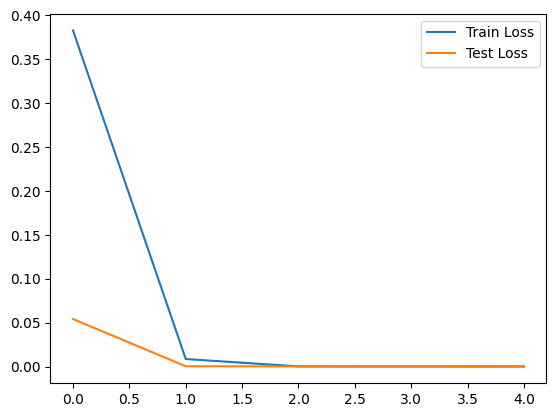

In [ ]:
model = NeuralNet(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()
num_epochs = 5
trainlosses, testlosses = train(model, optimizer, criterion, train_loader, test_loader, num_epochs, verbose=True, to_plot=True)

Epoch 1/5, Train Loss: 14.1232, Test Loss: 1.4913
Epoch 2/5, Train Loss: 0.2705, Test Loss: 0.0066
Epoch 3/5, Train Loss: 0.0033, Test Loss: 0.0023
Epoch 4/5, Train Loss: 0.0018, Test Loss: 0.0017
Epoch 5/5, Train Loss: 0.0015, Test Loss: 0.0014


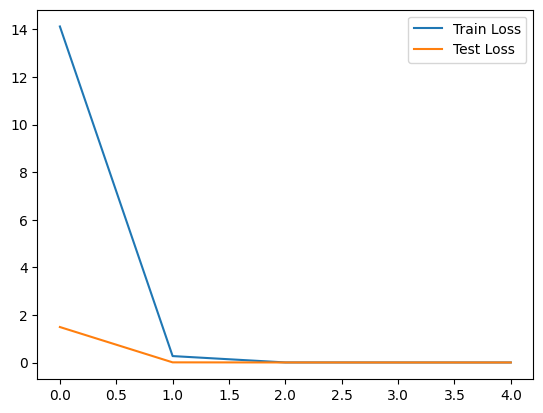

In [ ]:
model = NeuralNet(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Custom loss function
def custom_loss(output, target):
    return -torch.sum(target * torch.log(output))
num_epochs = 5
trainlosses, testlosses = train(model, optimizer, custom_loss, train_loader, test_loader, num_epochs, verbose=True, to_plot=True)

In [ ]:
# I plan to train two different objectives on the same data and model, each for 2 epochs alternatively
model = NeuralNet(2)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion1 = nn.BCELoss()
criterion2 = nn.MSELoss()
num_epochs = 2
for i in range(5):
    if i % 2 == 0:
        train(model, optimizer, criterion1, train_loader, test_loader, num_epochs, verbose=True, to_plot=False)
    else:
        train(model, optimizer, criterion2, train_loader, test_loader, num_epochs, verbose=True, to_plot=False)

Epoch 1/2, Train Loss: 0.4036, Test Loss: 0.1558
Epoch 2/2, Train Loss: 0.0351, Test Loss: 0.0007
Epoch 1/2, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 2/2, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 1/2, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 2/2, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 1/2, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 2/2, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 1/2, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 2/2, Train Loss: 0.0001, Test Loss: 0.0001


In [ ]:
# Now an essential modification is I want to do Multi Task Learning
# One would be the same to predict the circle
# Another would be to predict the distance between the two circles
# For the second task, the model has two parallel branches, one for each task
# In the backprop step, the common layers are updated by both
# The task-specific layers are updated by the corresponding task


model1 = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
)
model2 = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
)
task1_header = nn.Linear(32, 2)
task2_header = nn.Linear(64, 1)

In [ ]:
# I want to train on a parallel task which involves some of the layers of the model defined above
# The task is predicting the distanc between two given points
# We will take embeddings of the two points and concatenate them to predict the distance
# In this case, both embeddings are generated using the same model, then to update the model, we need to backpropagate the loss from the distance prediction task

class Combined_Model(nn.Module):
    def __init__(self, model1, model2, task2_header):
        super(Combined_Model, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.task2_header = task2_header

    # Define manually the forward pass
    def forward(self, x1,x2):
        x1 = self.model1(x1.float())
        x2 = self.model2(x2.float())
        # Concatenate the embeddings
        x = torch.cat([x1, x2], dim=1)
        x = self.task2_header(x)
        return x
    
    def get_models(self):
        return self.model1, self.model2, self.task2_header

combined_m = Combined_Model(model1, model2, task2_header)


In [ ]:
# random data
data1 = torch.randn(32, 2)
data2 = torch.randn(32, 2)
distances = torch.norm(data1 - data2, dim=1).unsqueeze(1)
print(data1.shape, data2.shape, distances.shape)

torch.Size([32, 2]) torch.Size([32, 2]) torch.Size([32, 1])


In [73]:
criterion = nn.MSELoss()
optimizer = optim.Adam(combined_m.parameters(), lr=0.001)
for i in range(5):
    optimizer.zero_grad()
    output = combined_m(data1, data2)
    loss = criterion(output, distances.float())
    loss.backward()
    optimizer.step()

In [74]:
model1, model2, task2_header = combined_m.get_models()

In [93]:
(model1.state_dict()['6.bias'] + model2.state_dict()['6.bias'])/2, model1.state_dict()['6.bias'], model2.state_dict()['6.bias']

(tensor([-0.0207,  0.0053,  0.0024,  0.0023,  0.0148, -0.1160,  0.0161,  0.0135,
          0.0003,  0.0183, -0.0750,  0.0027, -0.0053, -0.0340,  0.0174, -0.0900,
          0.0848,  0.0198,  0.0050, -0.0304, -0.0315,  0.0592, -0.0180, -0.0790,
         -0.0951, -0.0455,  0.1173,  0.0209, -0.0192,  0.0686,  0.0820, -0.0252]),
 tensor([-0.0168, -0.0056, -0.0321, -0.0461, -0.0263, -0.1242,  0.0330,  0.0839,
          0.0520, -0.0891, -0.1058,  0.0136, -0.1121, -0.0138, -0.0153, -0.0832,
          0.1009, -0.0830, -0.0630,  0.0014, -0.1149,  0.0656,  0.0792, -0.0843,
         -0.0712, -0.0722,  0.1068,  0.0988, -0.1116,  0.1110,  0.0548,  0.0742]),
 tensor([-0.0247,  0.0162,  0.0369,  0.0507,  0.0560, -0.1078, -0.0008, -0.0570,
         -0.0515,  0.1257, -0.0441, -0.0083,  0.1016, -0.0543,  0.0502, -0.0967,
          0.0687,  0.1225,  0.0729, -0.0621,  0.0519,  0.0527, -0.1151, -0.0738,
         -0.1191, -0.0189,  0.1278, -0.0569,  0.0733,  0.0261,  0.1092, -0.1247]))

In [95]:
from copy import deepcopy
new_model = deepcopy(model1)
# Iterate through each parameter of the models and compute mean
for param_new, (param_model1, param_model2) in zip(new_model.parameters(), zip(model1.parameters(), model2.parameters())):
    param_new.data.copy_((param_model1.data + param_model2.data) / 2)

In [96]:
new_model.state_dict()['6.bias']

tensor([-0.0207,  0.0053,  0.0024,  0.0023,  0.0148, -0.1160,  0.0161,  0.0135,
         0.0003,  0.0183, -0.0750,  0.0027, -0.0053, -0.0340,  0.0174, -0.0900,
         0.0848,  0.0198,  0.0050, -0.0304, -0.0315,  0.0592, -0.0180, -0.0790,
        -0.0951, -0.0455,  0.1173,  0.0209, -0.0192,  0.0686,  0.0820, -0.0252])

#### MUTLI TASK LEARNING

In [49]:
# Data for the two tasks
# Generate some data which requires us to predict if data corresponds to circle C1 or C2
# C1 is a circle with radius 1 and center at (2, 0)
# C2 is a circle with radius 1 and center at (-2, 0)
def generate_data(n):
    data = []
    labels = []
    while len(data) < n:
        x = numpy.random.uniform(-4, 4)
        y = numpy.random.uniform(-1, 1)
        if (x - 2)**2 + y**2 <= 1:
            data.append([x, y])
            labels.append(0)
        elif (x + 2)**2 + y**2 <= 1:
            data.append([x, y])
            labels.append(1)
    return numpy.array(data), numpy.array(labels)

# Generate data
data_task1, labels_task1 = generate_data(1000)
data_task1.shape, labels_task1.shape


((1000, 2), (1000,))

In [50]:
import numpy as np 
labels = np.eye(2)[labels_task1]
labels.shape

(1000, 2)

In [51]:
# Choose data2 as a zip of 2 random points in the data_task1
data1_task2 = []
data2_task2 = []
output_task2 = []
for i in range(1000):
    data1_task2.append(data_task1[i])
    data2_task2.append(data_task1[numpy.random.randint(0, 1000)])
    output_task2.append(numpy.linalg.norm(data1_task2[-1] - data2_task2[-1]))
data1_task2 = numpy.array(data1_task2)
data2_task2 = numpy.array(data2_task2)
output_task2 = numpy.array(output_task2)

data1_task2.shape, data2_task2.shape, output_task2.shape

((1000, 2), (1000, 2), (1000,))

In [52]:
train_data_task1 = data_task1[:800]
train_labels_task1 = labels_one_hot[:800]
test_data_task1 = data_task1[800:]
test_labels_task1 = labels_one_hot[800:]

train_data1_task2 = data1_task2[:800]
train_data2_task2 = data2_task2[:800]
train_output_task2 = output_task2[:800]
test_data1_task2 = data1_task2[800:]
test_data2_task2 = data2_task2[800:]
test_output_task2 = output_task2[800:]

train_data_task1.shape, train_labels_task1.shape, test_data_task1.shape, test_labels_task1.shape, train_data1_task2.shape, train_data2_task2.shape, train_output_task2.shape, test_data1_task2.shape, test_data2_task2.shape, test_output_task2.shape

((800, 2),
 (800, 2),
 (200, 2),
 (200, 2),
 (800, 2),
 (800, 2),
 (800,),
 (200, 2),
 (200, 2),
 (200,))

In [53]:
class CircleDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [54]:
class DistanceDataset(torch.utils.data.Dataset):
    def __init__(self, data1, data2, output):
        self.data1 = data1
        self.data2 = data2
        self.output = output

    def __len__(self):
        return len(self.data1)
    
    def __getitem__(self, index):
        return self.data1[index], self.data2[index], self.output[index]

In [55]:
trainloader_task1 = torch.utils.data.DataLoader(CircleDataset(train_data_task1, train_labels_task1), batch_size=32, shuffle=True)
testloader_task1 = torch.utils.data.DataLoader(CircleDataset(test_data_task1, test_labels_task1), batch_size=32, shuffle=False)

trainloader_task2 = torch.utils.data.DataLoader(DistanceDataset(train_data1_task2, train_data2_task2, train_output_task2), batch_size=32, shuffle=True)
testloader_task2 = torch.utils.data.DataLoader(DistanceDataset(test_data1_task2, test_data2_task2, test_output_task2), batch_size=32, shuffle=False)

In [31]:
from copy import deepcopy
class Task1_Model:
    def __init__(self, model1, task1_header):
        self.model1 = deepcopy(model1)
        self.task1_header = deepcopy(task1_header)

    def forward(self, x):
        x = self.model1(x.float())
        x = self.task1_header(x)
        return x

    def get_model(self):
        return nn.Sequential(self.model1, self.task1_header)
    
class Task2_Model:
    def __init__(self, model2, task2_header):
        self.model1 = deepcopy(model2)
        self.model2 = deepcopy(model2)
        self.task2_header = deepcopy(task2_header)

    def forward(self, x1, x2):
        x1 = self.model1(x1.float())
        x2 = self.model2(x2.float())
        # concatenate the embeddings
        x = torch.cat([x1, x2], dim=1)
        x = self.task2_header(x)
        return x
    
    def get_model(self):
        return 

In [35]:
def train_task1(model, optimizer, criterion, train_loader, test_loader, num_epochs, verbose=True):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        task1_header.train()
        train_loss = 0
        for data, labels in train_loader:
            optimizer.zero_grad()
            output = model(data.float())
            loss = criterion(output, labels.float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        task1_header.eval()
        test_loss = 0
        with torch.no_grad():
            for data, labels in test_loader:
                output = model(data.float())
                loss = criterion(output, labels.float())
                test_loss += loss.item()
            test_losses.append(test_loss / len(test_loader))

        if(verbose): print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    return model.model, model.task1_header

In [36]:
def train_task2(model, optimizer, criterion, train_loader, test_loader, num_epochs, verbose=True):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data1, data2, distances in train_loader:
            optimizer.zero_grad()
            output = model(data1, data2)
            loss = criterion(output, distances.float())
            loss.backward()
            optimizer.step() # this updates the mode
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data1, data2, distances in test_loader:
                output = model(data1, data2)
                loss = criterion(output, distances.float())
                test_loss += loss.item()
            test_losses.append(test_loss / len(test_loader))

        if(verbose): print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
    
    return model.model1, model.model2, model.task2_header

In [57]:
def get_models():
    model = nn.Sequential(
        nn.Linear(2, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
    )
    task1_header = nn.Sequential(
        nn.Linear(32, 2),
        nn.Softmax(dim=1)
    )
    task2_header = nn.Linear(64, 1)

    return model, task1_header, task2_header

In [63]:
model, task1_header, task2_header = get_models()
for i in range(1):
    print("Training Task 1")
    new_model = nn.Sequential(
        model,
        task1_header
    )
    optimizer_model = optim.Adam(new_model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    for epoch in range(3):
        new_model.train()
        train_loss = 0
        for data, labels in trainloader_task1:
            optimizer_model.zero_grad()
            output = new_model(data.float())
            loss = criterion(output, labels.float())
            loss.backward() 
            optimizer_model.step()
            train_loss += loss.item()
        
        new_model.eval()
        test_loss = 0
        for data, labels in testloader_task1:
            output = new_model(data.float())
            loss = criterion(output, labels.float())
            test_loss += loss.item()

        model = deepcopy(new_model[0])
        task1_header = deepcopy(new_model[1])
        
        print(f'Epoch {epoch+1}/3, Train Loss: {train_loss / len(trainloader_task1):.4f}, Test Loss: {test_loss / len(testloader_task1):.4f}')


    # task1_model = Task1_Model(model, task1_header)
    # optimizer = optim.Adam(task1_model.get_model(), lr=0.001)
    # criterion = nn.BCELoss()
    # model, task1_header = train_task1(task1_model, optimizer, criterion, trainloader_task1, testloader_task1, 2, verbose=True)

    # print("Training Task 2")
    # task2_model = Task2_Model(model, task2_header)
    # optimizer = optim.Adam(task2_model.get_model(), lr=0.001)
    # criterion = nn.MSELoss()
    # model1, model2, task2_header = train_task2(task2_model, optimizer, criterion, trainloader_task2, testloader_task2, 2, verbose=True)

    # newmodel = deepcopy(model1)
    # for param_new, (param_model1, param_model2) in zip(new_model.parameters(), zip(model1.parameters(), model2.parameters())):
    #     param_new.data.copy_((param_model1.data + param_model2.data) / 2)

    # model = deepcopy(newmodel)
    

Training Task 1
Epoch 1/3, Train Loss: 0.6962, Test Loss: 0.6928
Epoch 2/3, Train Loss: 0.6932, Test Loss: 0.6936
Epoch 3/3, Train Loss: 0.6928, Test Loss: 0.6956
